# Data Science
### Exploring the Iris Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load Data
Load the data from CSV file into a Pandas dataframe, and print the top few rows.

In [2]:
data = pd.read_csv('iris.data')
data.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


### Customize columns
Drop the redundant id column, and rename Attribute columns to integers. Save column names for use later.

In [3]:
data = data.drop('id', 1)
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
data.rename(columns = {cols[0]:0, cols[1]:1, cols[2]:2, cols[3]:3}, inplace=True)
data.loc[::50]

c:\users\himura\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,0,1,2,3,species
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


### Statistical Overview
Show shape of dataframe and statistical overview of attribute columns.

In [4]:
print(data.shape)
data.describe()

(150, 5)


,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# same as data['species'].value_counts()
data.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

### Histograms
Histograms are useful for showing how the data is distributed. They're ridiculously easy to use, but can only show two axes.

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

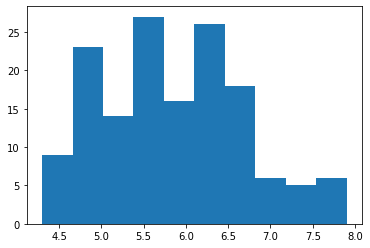

In [6]:
plt.hist(data[0])

Here we give 4 columns of data to the Histogram maker, and it automatically color codes them.

(array([[ 0.,  0.,  0.,  0.,  0., 11., 48., 49., 31., 11.],
        [ 0.,  0., 11., 97., 38.,  4.,  0.,  0.,  0.,  0.],
        [ 0., 44.,  6.,  1., 10., 34., 30., 20.,  5.,  0.],
        [50., 52., 45.,  3.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([0.1 , 0.88, 1.66, 2.44, 3.22, 4.  , 4.78, 5.56, 6.34, 7.12, 7.9 ]),
 <a list of 4 BarContainer objects>)

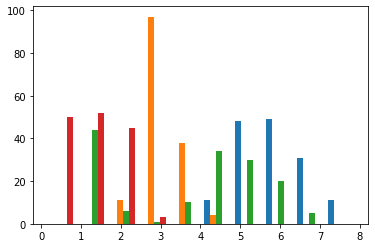

In [7]:
plt.hist([data[0], data[1], data[2], data[3]])

To add a Legend we need to add labels to the Histogram builder as a list of column names, and call the legend function.

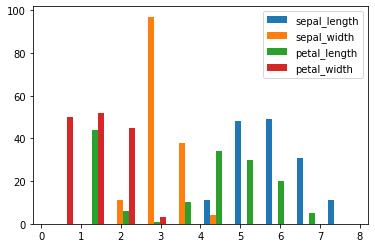

In [8]:
plt.hist([data[0], data[1], data[2], data[3]], label=[cols[0],cols[1],cols[2],cols[3]])
plt.legend()

Or we can make 4 separate calls to the Histogram builder and get 4 overlapping plots.

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

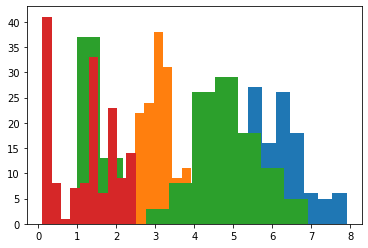

In [9]:
plt.hist(data[0])
plt.hist(data[1]) 
plt.hist(data[2])
plt.hist(data[3])

We can use alpha to control the opacity of plots. alpha of 1 is opague. alpha of 0 is transparent.

(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <BarContainer object of 10 artists>)

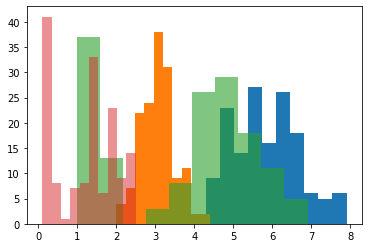

In [10]:
plt.hist(data[0])
plt.hist(data[1], alpha=1) 
plt.hist(data[2], alpha=0.6)
plt.hist(data[3], alpha=0.5)

We can also plot the 4 columns on separate subplots to make it more readable. This is very readable, but beware that each plot automatically scales its axes to the data.

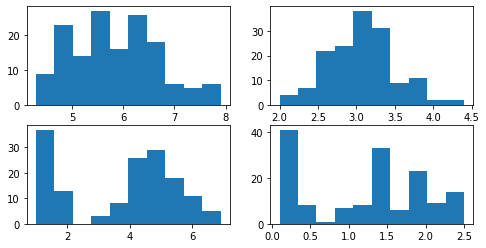

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(8, 4))
ax[0, 0].hist(data[0])
ax[0, 1].hist(data[1])
ax[1, 0].hist(data[2])
ax[1, 1].hist(data[3])
plt.show()

Adding titles to the previous plot makes it more readable.

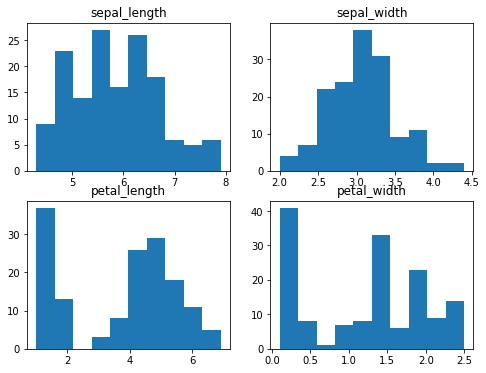

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
ax[0, 0].hist(data[0])
ax[0, 1].hist(data[1])
ax[1, 0].hist(data[2])
ax[1, 1].hist(data[3])
ax[0, 0].set_title(cols[0])
ax[0, 1].set_title(cols[1])
ax[1, 0].set_title(cols[2])
ax[1, 1].set_title(cols[3])
plt.show()

### Scatter Plots
These are probably more useful for this dataset because they can show clusters by species. The most basic scatter plot does not distinguish species.

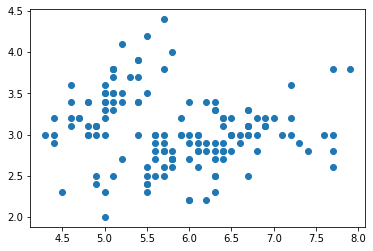

In [13]:
plt.scatter(
    data[0], 
    data[1],)

Adding color coding by species allows us to see clustering for 2 attributes for each species. Here setosa is secluded, but virginica and versicolor overlap.

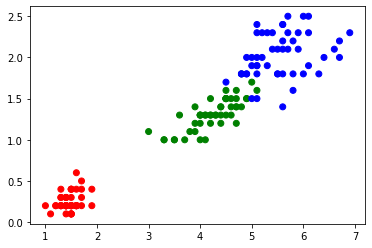

In [14]:
colors = {'Iris-setosa':'red', 'Iris-virginica':'blue', 'Iris-versicolor':'green'}
plt.scatter(
    data[2], 
    data[3], 
    c=data['species'].map(colors))

Adding labels to the x and y axes is useful, but we can see the data for virginica and versicolor still overlap. If we could find 1 attribute where there's no overlap for these 2 species then we could use those to definitively distinguish them. But unfortunately all 4 attributes have some overlap.

Text(0, 0.5, 'petal_length')

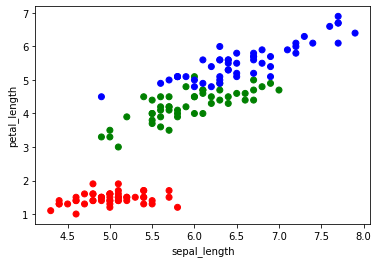

In [15]:
plt.scatter(
    data[0], 
    data[2], 
    c=data['species'].map(colors))
plt.xlabel(cols[0])
plt.ylabel(cols[2])

Here we add a title to the plot, and show attributes 1 and 3. 

Text(0.5, 1.0, 'Iris Data Scatter Plot')

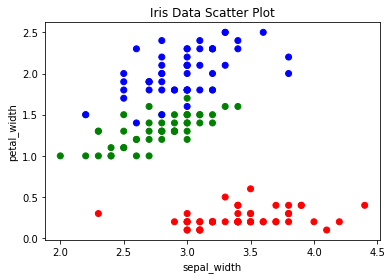

In [16]:
plt.scatter(
    data[1], 
    data[3], 
    c=data['species'].map(colors))
plt.xlabel(cols[1])
plt.ylabel(cols[3])
plt.title('Iris Data Scatter Plot')

### Correlation
We can see the correlation between attributes. A correlation close to 1 helps us distinguish between species. Low correlation doesn't help us.

In [17]:
data.corr()

,0,1,2,3
0,1.000000,-0.109369,0.871754,0.817954
1,-0.109369,1.000000,-0.420516,-0.356544
2,0.871754,-0.420516,1.000000,0.962757
3,0.817954,-0.356544,0.962757,1.000000


### Box and Whisker Plots
Box plots show the distribution of data over an attribute by showing the 25th, 50th (median) and 75th percentiles. Again, the simplest plots are not very useful, but when we add labels and color coding the plots are revealing.

{'whiskers': [<matplotlib.lines.Line2D at 0x2ca96207b48>,
 'caps': [<matplotlib.lines.Line2D at 0x2ca9620e348>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ca962075c8>,
 'medians': [<matplotlib.lines.Line2D at 0x2ca96213a48>,
 'fliers': [<matplotlib.lines.Line2D at 0x2ca96213f08>,
 'means': []}

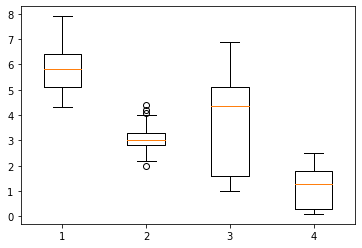

In [18]:
plt.boxplot([data[0], data[1], data[2], data[3]])

This shows a boxplot for one attribute, sorted by species. For this attribute we can see a big overlap between the 3 species, so it's not very useful for distinguishing. An iris with 5.5 or 6.0 for this attribute could be any of the 3 species.

<AxesSubplot:title={'center':'0'}, xlabel='[species]'>

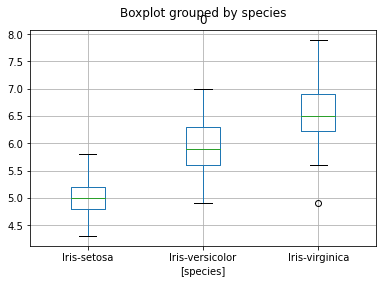

In [19]:
data.boxplot(column=[0], by=['species'])

It's tricky to do subplots, but worth it. We can see setosa has smaller petals than the other 2 species. And versicolor has, on average, smaller sepals and smaller petals than virginica; but there is some overlap.

Text(0.5, 1.0, 'petal_width')

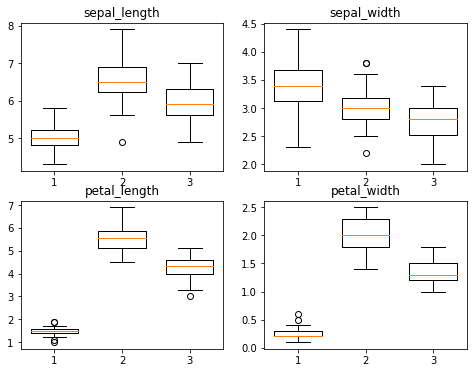

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(8, 6))
A = [data[0][data.species == 'Iris-setosa'], data[0][data.species == 'Iris-virginica'], data[0][data.species == 'Iris-versicolor']]
B = [data[1][data.species == 'Iris-setosa'], data[1][data.species == 'Iris-virginica'], data[1][data.species == 'Iris-versicolor']]
C = [data[2][data.species == 'Iris-setosa'], data[2][data.species == 'Iris-virginica'], data[2][data.species == 'Iris-versicolor']]
D = [data[3][data.species == 'Iris-setosa'], data[3][data.species == 'Iris-virginica'], data[3][data.species == 'Iris-versicolor']]

ax[0, 0].boxplot(A, widths = 0.7)
ax[0, 0].set_title(cols[0])
ax[0, 1].boxplot(B, widths = 0.7)
ax[0, 1].set_title(cols[1])
ax[1, 0].boxplot(C, widths = 0.7)
ax[1, 0].set_title(cols[2])
ax[1, 1].boxplot(D, widths = 0.7)
ax[1, 1].set_title(cols[3])

This plot does an awsome job of showing distributions of all 4 attributes for all 3 species. 12 box plots in 1 graph! The color coding makes it more readable. 

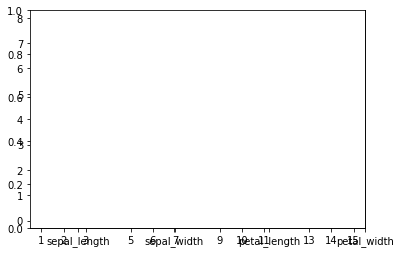

In [21]:
def set_color(bp):
    plt.setp(bp['boxes'][0], color='blue')
    plt.setp(bp['boxes'][1], color='red')
    plt.setp(bp['boxes'][2], color='green')

A = [data[0][data.species == 'Iris-setosa'], data[0][data.species == 'Iris-virginica'], data[0][data.species == 'Iris-versicolor']]
B = [data[1][data.species == 'Iris-setosa'], data[1][data.species == 'Iris-virginica'], data[1][data.species == 'Iris-versicolor']]
C = [data[2][data.species == 'Iris-setosa'], data[2][data.species == 'Iris-virginica'], data[2][data.species == 'Iris-versicolor']]
D = [data[3][data.species == 'Iris-setosa'], data[3][data.species == 'Iris-virginica'], data[3][data.species == 'Iris-versicolor']]

# add this to remove outlier symbols: 0, '',
bp = plt.boxplot(A, 0, '', positions = [1, 2, 3], widths = 0.7)
set_color(bp)
bp = plt.boxplot(B, 0, '', positions = [5, 6, 7], widths = 0.7)
set_color(bp)
bp = plt.boxplot(C, 0, '', positions = [9, 10, 11], widths = 0.7)
set_color(bp)
bp = plt.boxplot(D, 0, '', positions = [13, 14, 15], widths = 0.7)
set_color(bp)

ax = plt.axes()
ax.set_xticks([2, 6, 10, 14])
ax.set_xticklabels(cols)

plt.show()